<a href="https://colab.research.google.com/github/eonadler/Colab-Notebooks/blob/main/stream_viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# USC HH Introventure @ Carnegie Observatories: Stellar Stream VizLab Workshop

## Introduction

This workshop provides a hands-on introduction to the fascinating astronomical systems known as ***stellar streams***, many of which have been discovered in recent years near our own galaxy, the Milky Way.

A stellar stream is a relatively long and thin group stars that originated from a common ancestor; most nearby stellar streams are the remains of small dwarf galaxies or star clusters that were torn apart as they orbited the Milky Way. For more background, check out [this Science article](https://www.science.org/content/article/streams-stars-reveal-galaxy-s-violent-history-and-perhaps-its-unseen-dark-matter).

## How to use this notebook

Each block of code (or "cell") on this page runs Python code on the Google cloud. To run a cell, click anywhere inside of it then enter `shift`+`return`. Or, hover your mouse over the cell and click the "play" icon that appears at the top left. The cell is finished running when a small green check-mark appears at the top left.

Run the cells below, following any instructions that appear before each cell.

### 1. Code imports

In [ ]:
!pip install gala
!pip install PyntCloud

import os
import gdown
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from ctypes import c_ubyte
import astropy.units as u
import numpy as np
import gala.potential as gp
import gala.dynamics as gd
from gala.dynamics import mockstream as ms
from gala.units import galactic
from pyntcloud import PyntCloud
import astropy.coordinates as coord
_ = coord.galactocentric_frame_defaults.set('v4.0')

%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.style.use('dark_background')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 17.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.3/346.3 KB 3.8 MB/s eta 0:00:00


### 2. Download known streams

In [ ]:
#Download simulation data

# gdown.download_folder("https://drive.google.com/drive/folders/1nSUPuzcBseRMMIDYiC1APrmk4QXJdY9Z?usp=share_link", quiet=True)

# stream_dict = {}
# for stream in os.listdir('stream-data-for-viz'):
#   if stream.endswith('.csv'):
#     stream_dict[stream[:-4]] = pd.read_csv('stream-data-for-viz/{}'.format(stream))

# filehandler = open("stream_dict.pkl","wb")
# pickle.dump(stream_dict,filehandler)
# filehandler.close()

gdown.download("https://drive.google.com/uc?id=1Alv1-8sJCyLTLFllErCx-k1cCIvi40Kq", quiet=True)
file = open("stream_dict.pkl",'rb')
stream_dict = pickle.load(file)
file.close()

If the cell above fails:

1. Go to: https://drive.google.com/file/d/1Alv1-8sJCyLTLFllErCx-k1cCIvi40Kq/view?usp=sharing

2. Click "download"

4. Click the "upload to session storage" icon on the top of the pane that appears

5. Upload the stream_dict.pkl file you downloaded

### 3. Plot known streams near the Milky Way

To create your own version, change the colormaps for the Disk, Sagittarius, and MagellanicClouds to create your own version. To change colormap, change 'binary', 'Reds', and 'Blues' to any of those listed here: https://matplotlib.org/stable/tutorials/colors/colormaps.html.

You can also change the variables that set color intensity --- for example, try changing `c=np.abs(stream_dict[stream]['z'].values)` in the `Disk` block to `c=np.abs(stream_dict[stream]['x'].values)`, and see how the plot changes.

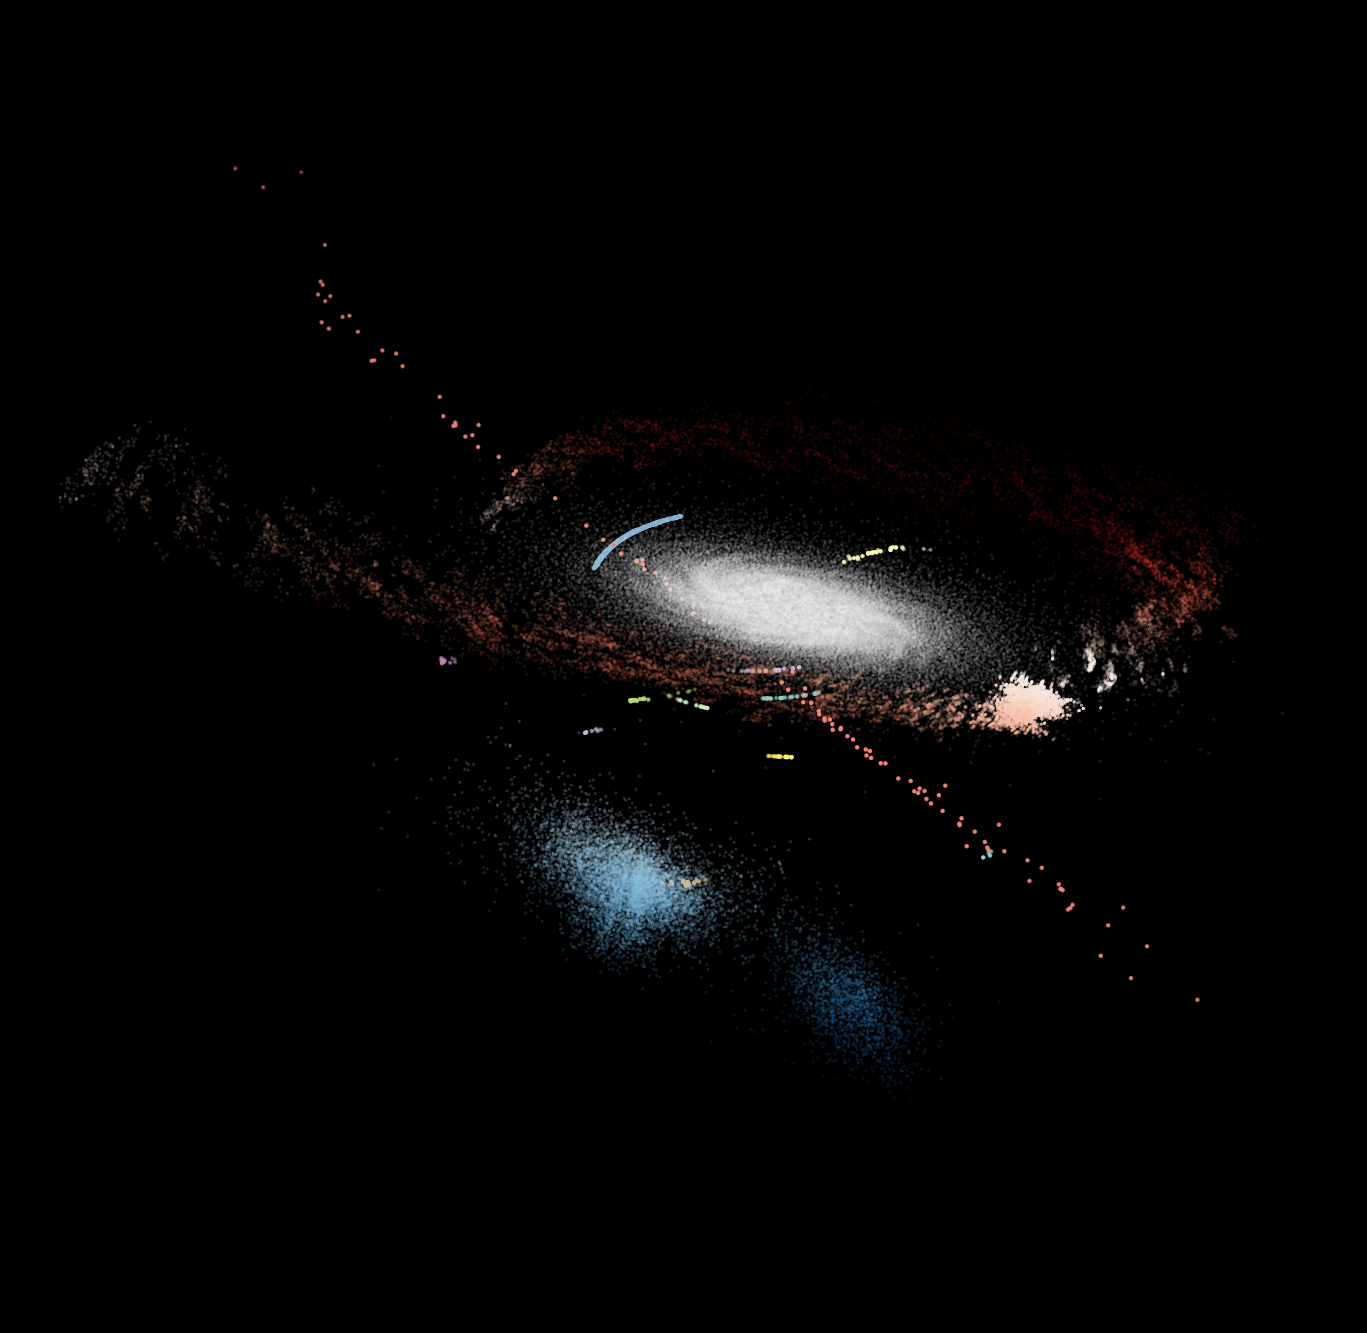

In [ ]:
### Set variables ###

#Change these!
disk_cmap = 'binary'
Sagittarius_cmap = 'Reds'
MagellanicClouds_cmap = 'Blues'

### Plot streams ###

fig, ax = plt.subplots(figsize=(12,12))
ax = plt.axes(projection='3d')

# Plot data for each three-dimensional stream
for stream in stream_dict:
  if stream == 'Disk':
    ax.scatter(stream_dict[stream]['x'].values, stream_dict[stream]['y'].values,stream_dict[stream]['z'].values,
               cmap=disk_cmap,c=np.abs(stream_dict[stream]['z'].values),s=0.15,alpha=0.15)
  elif stream == 'Sagittarius':
    ax.scatter(stream_dict[stream]['x'].values, stream_dict[stream]['y'].values,stream_dict[stream]['z'].values,
               cmap=Sagittarius_cmap,c=np.abs(stream_dict[stream]['z'].values),s=0.15,alpha=0.15)
  elif stream == 'MagellanicClouds':
    ax.scatter(stream_dict[stream]['x'].values, stream_dict[stream]['y'].values,stream_dict[stream]['z'].values,
               cmap=MagellanicClouds_cmap,c=np.abs(stream_dict[stream]['z'].values),s=0.15,alpha=0.25)
  else:
    ax.scatter(stream_dict[stream]['x'].values, stream_dict[stream]['y'].values,stream_dict[stream]['z'].values,s=1.5)

ax.set_xlim(-30,20)
ax.set_axis_off()

### 4. Generate your own stream for VizLab

Next, you'll generate a custom stream to display on the VizLab. Change the position (`x`, `y`, `z`), velocity (`vx`, `vy`, `vz`), mass (`prog_mass`), age (`age`), and color (`color`) of your stream in the cell below.

Note: to test the impact of changing a parameter, change values one at a time and in small increments, e.g., by 10 kpc for positions, 10 km/s for velocities, and multiples of 2 for mass and age.

In [ ]:
#Set milky way data
pot = gp.NFWPotential.from_circular_velocity(v_c=220*u.km/u.s,
                                             r_s=15*u.kpc,
                                             units=galactic)

H = gp.Hamiltonian(pot)


###Change the numbers and color below!
adjustable_params = {}

adjustable_params['x'] = 10.
adjustable_params['y'] = 0.
adjustable_params['z'] = 0.

adjustable_params['vx'] = 0.
adjustable_params['vy'] = 170.
adjustable_params['vz'] = 0.

adjustable_params['prog_mass'] = 2.5*10**4
adjustable_params['age'] = 1000

adjustable_params['color'] = 'teal'

###Create stream
prog_w0 = gd.PhaseSpacePosition(pos=[adjustable_params['x'], adjustable_params['y'], adjustable_params['z']] * u.kpc,
                                vel=[adjustable_params['vx'], adjustable_params['vy'], adjustable_params['vz']] * u.km/u.s)

df = ms.FardalStreamDF()
prog_mass = adjustable_params['prog_mass'] * u.Msun

gen = ms.MockStreamGenerator(df, H)

stream, prog = gen.run(prog_w0, prog_mass,
                       dt=1 * u.Myr, n_steps=adjustable_params['age'])

Then, see how it looks!

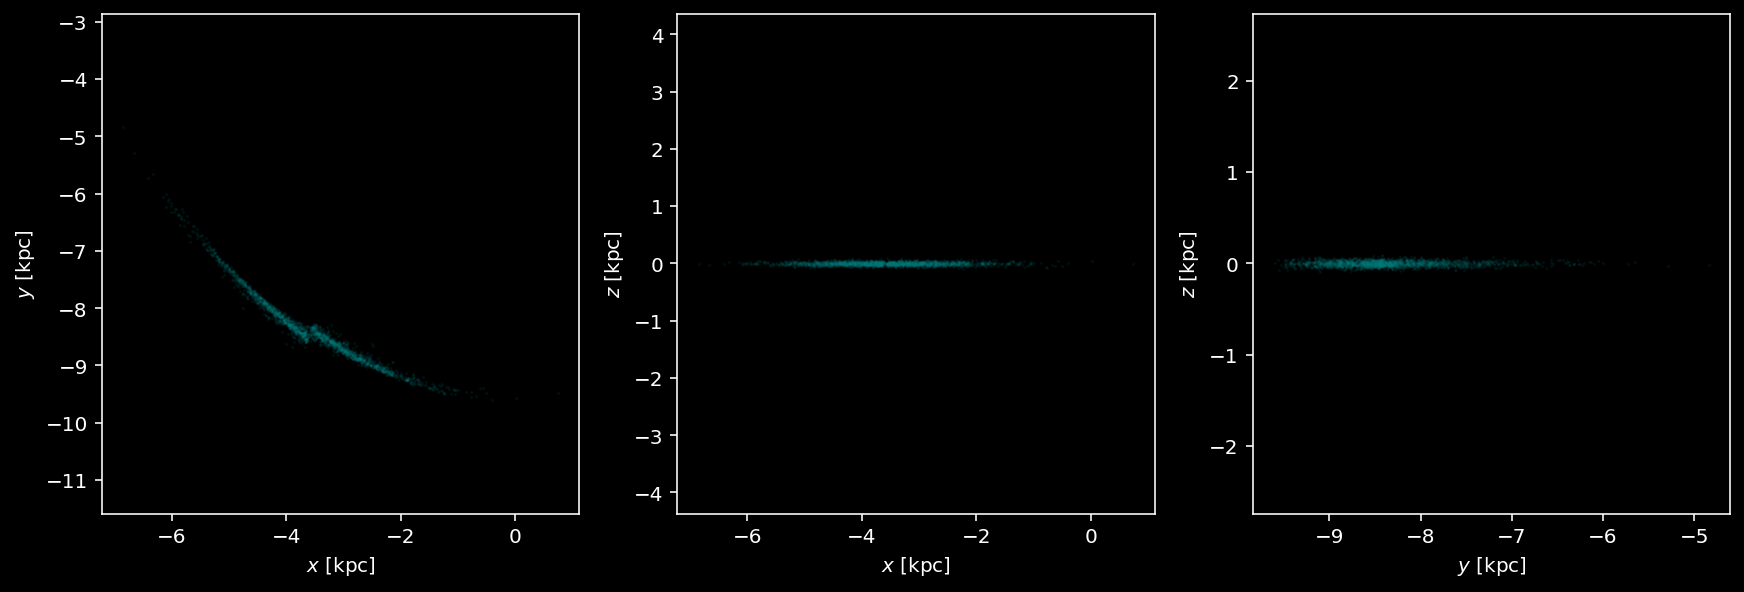

In [ ]:
stream.plot(color=adjustable_params['color'],alpha=0.1,s=1.5)

plt.show()

### 5. Convert your stream data to VizLab format

In [ ]:
rgb_color = mpl.colors.to_rgb(adjustable_params['color'])
Npoint = np.size(stream.pos.x)
r_array = np.ones(Npoint, dtype=c_ubyte) * int(rgb_color[0] * 255)
g_array = np.ones(Npoint, dtype=c_ubyte) * int(rgb_color[1] * 255)
b_array = np.ones(Npoint, dtype=c_ubyte) * int(rgb_color[2] * 255)

your_stream = pd.DataFrame(data={'x': np.array(stream.pos.x),
                                 'y': np.array(stream.pos.y),
                                 'z': np.array(stream.pos.z),
                                 'red': r_array,
                                 'green': g_array,
                                 'blue': b_array})

#Enter your name here:
your_name = 'ethan'

#Save your stream
cloud = PyntCloud(your_stream)
print(cloud)
cloud.to_file("{}_stream_{}.ply".format(your_name,adjustable_params['color']))

PyntCloud
2002 points with 3 scalar fields
0 faces in mesh
0 kdtrees
0 voxelgrids
Centroid: -3.5720712466613174, -8.360111445206783, -0.0011665419983709583
Other attributes:



### 6. Upload stream to Google Drive for VizLab display

1. Download the "your_name_stream.ply" file from the left-hand panel: hover your mouse over it, click the three dots, and click "download" (note: it takes ~1 minute for the file to appear on the left-hand panel!).

2. Go to: https://drive.google.com/drive/folders/1ErYj60vAUA9Mv1SCog0Eh2Xnc5J8wJEi?usp=sharing

3. Right-click, then click "file upload"; upload your stream data